K-means clustering with 4 clusters of sizes 293, 214, 52, 376

Cluster means:
       wage        IQ      KWW     educ      age   married
1  555.1092  95.98976 32.86007 12.80546 32.38567 0.8293515
2 1319.3645 106.32243 38.33178 14.24299 33.34112 0.9485981
3 2013.2692 111.05769 41.38462 15.53846 34.28846 0.9230769
4  920.2074 101.18617 35.73936 13.25798 33.30585 0.9069149

Clustering vector:
  [1] 4 4 4 1 1 2 1 4 2 4 4 4 4 2 3 4 2 4 4 1 2 2 4 3 4 2 2 4 2 1 4 2 3 1 3 4 2
 [38] 2 1 4 1 2 2 4 3 4 4 2 2 4 4 2 3 4 1 4 4 2 2 4 3 2 4 4 4 1 1 1 2 2 2 3 3 2
 [75] 4 4 4 4 1 4 4 1 2 3 1 4 4 4 1 1 3 4 4 2 4 1 2 2 4 4 2 4 4 1 2 4 2 4 2 4 4
[112] 4 2 4 1 1 1 1 2 1 2 2 4 4 4 4 4 3 2 4 2 2 2 1 2 4 4 4 4 4 4 1 4 1 4 2 3 4
[149] 4 2 2 1 1 2 1 4 3 3 4 2 2 4 4 1 2 2 3 2 2 1 4 4 4 4 4 1 2 1 1 1 1 4 2 4 2
[186] 1 1 4 1 4 4 4 4 3 2 2 1 3 3 4 4 1 1 1 1 4 1 1 1 4 4 2 1 1 1 2 4 1 2 1 4 1
[223] 4 2 4 2 4 2 1 1 2 2 2 2 4 4 1 1 3 3 2 3 4 4 1 2 4 4 4 4 2 2 4 2 4 4 4 1 1
[260] 4 4 2 1 1 4 4 1 3 4 1 2 2 4 2 1 2 4 4 1 4

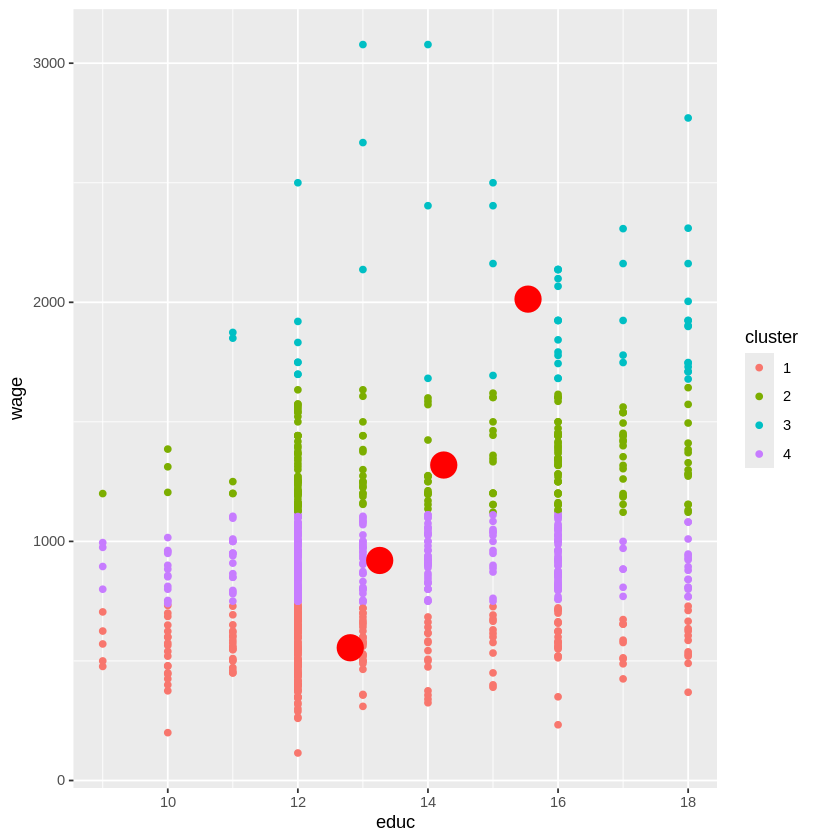

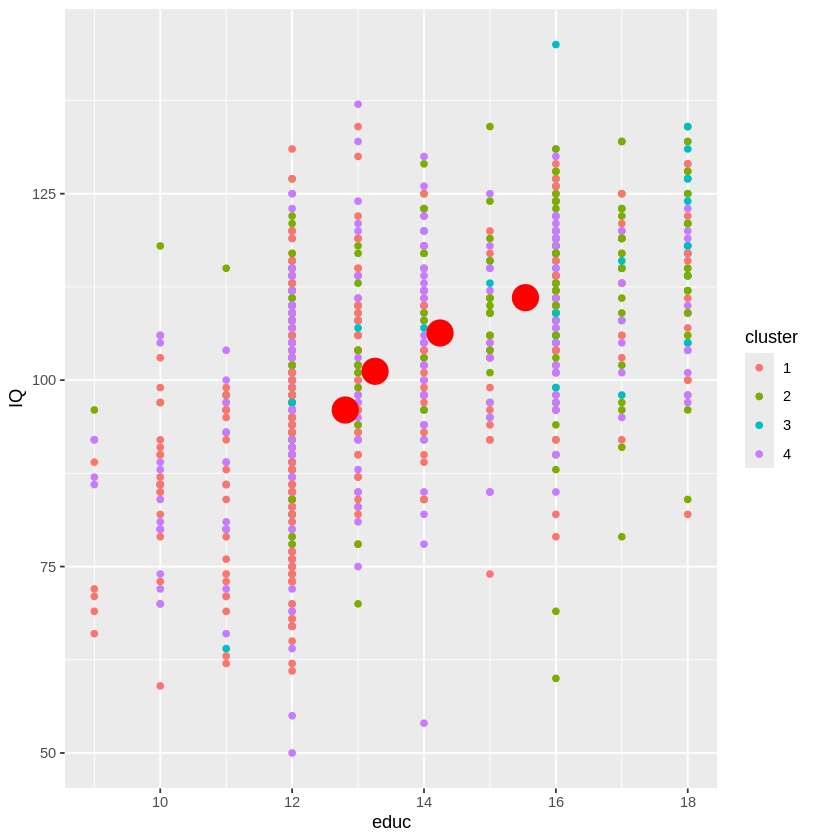

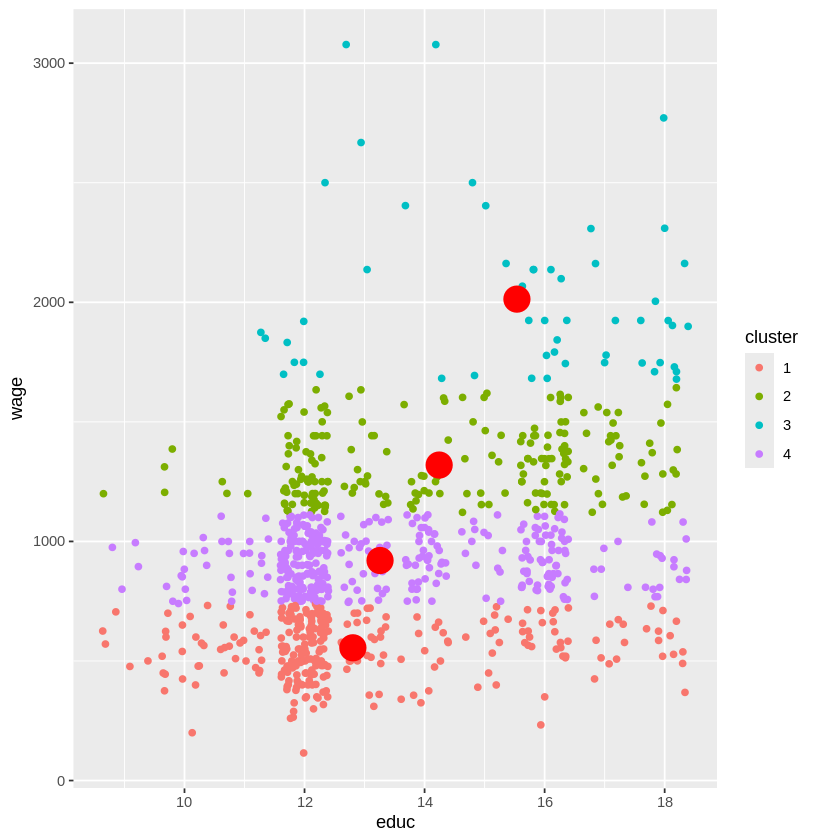

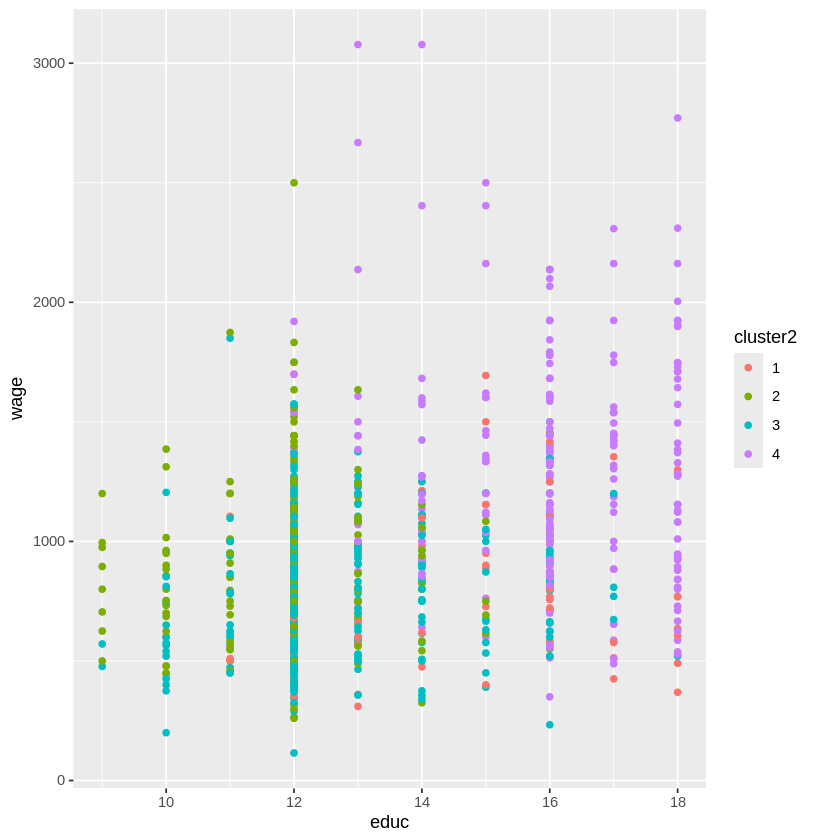

           PC1        PC2         PC3
IQ   0.5994431 -0.3116398 -0.73725745
KWW  0.5413277  0.8363384  0.08661666
educ 0.5896035 -0.4510196  0.67003657


Importance of components:
                          PC1    PC2    PC3
Standard deviation     1.3714 0.7979 0.6948
Proportion of Variance 0.6269 0.2122 0.1609
Cumulative Proportion  0.6269 0.8391 1.0000

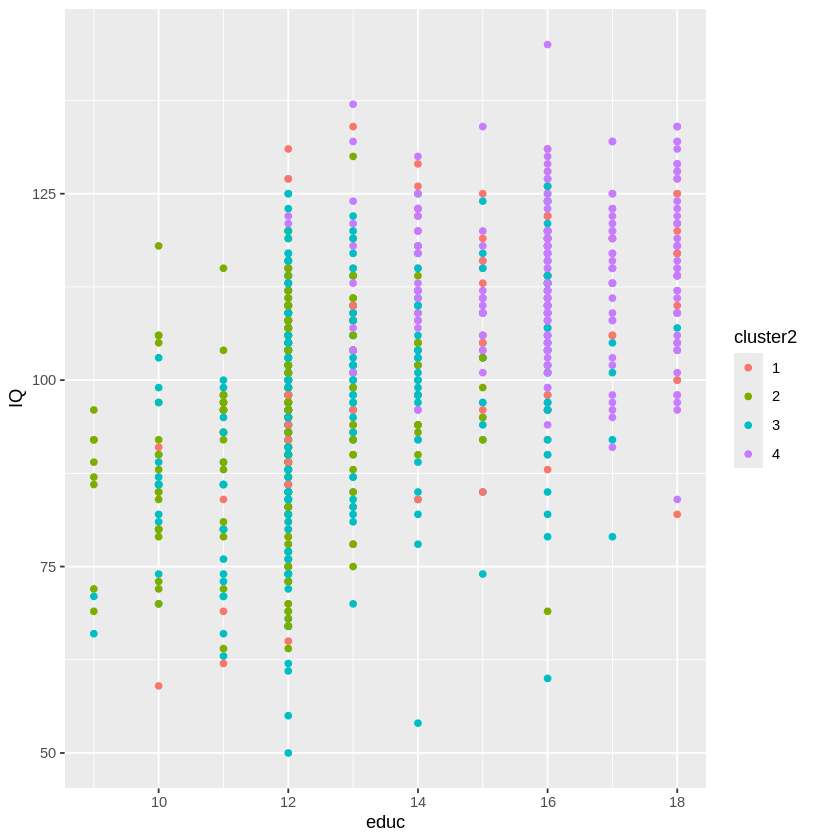


Call:
lm(formula = wage ~ PC1, data = sw)

Residuals:
    Min      1Q  Median      3Q     Max 
-914.52 -241.02  -35.99  194.77 2215.61 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  957.945     12.100   79.17   <2e-16 ***
PC1          119.264      8.828   13.51   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 370 on 933 degrees of freedom
Multiple R-squared:  0.1636,	Adjusted R-squared:  0.1627 
F-statistic: 182.5 on 1 and 933 DF,  p-value: < 2.2e-16



Call:
lm(formula = wage ~ IQ + KWW + educ, data = sw)

Residuals:
    Min      1Q  Median      3Q     Max 
-927.30 -240.12  -32.46  199.57 2250.92 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -231.6018    92.1449  -2.513 0.012123 *  
IQ             3.5675     0.9749   3.660 0.000267 ***
KWW           10.6471     1.7859   5.962 3.54e-09 ***
educ          33.2366     6.5997   5.036 5.71e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 369.9 on 931 degrees of freedom
Multiple R-squared:  0.1657,	Adjusted R-squared:  0.163 
F-statistic: 61.64 on 3 and 931 DF,  p-value: < 2.2e-16


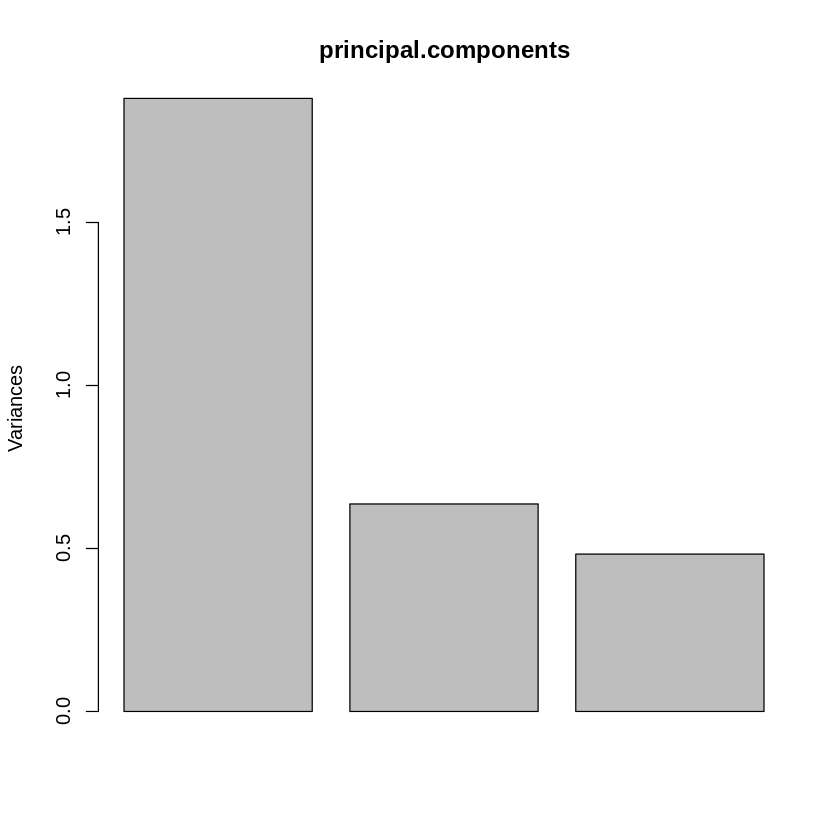

In [3]:
# Clustering example
library(MASS)
library(ggplot2)
wages<-read.csv('http://inta.gatech.s3.amazonaws.com/wage2.csv')
subwages <-wages[,c("wage","IQ","KWW","educ","age","married")]
# Cluster based only on a subset of the data
cluster.results<-kmeans(subwages, 4, nstart=5)
# Calculate clusters, using 5 different starting samples
print(cluster.results)
# Look at cluster results
subwages$cluster<-as.factor(cluster.results$cluster)
# The 'cluster' element of the results is the cluster which each data
# point belongs

ggplot(data=subwages, aes(x=educ, y=wage)) + geom_point(aes(colour=cluster))  +
  geom_point(data=data.frame(cluster.results$centers), colour='red', size=7)
ggplot(data=subwages, aes(x=educ, y=IQ)) + geom_point(aes(colour=cluster)) +
  geom_point(data=data.frame(cluster.results$centers), colour='red', size=7)
# We can plot the data points with colors for the different clusters.
# The colors match up differently along different dimensions

# If you want to see these plots with the data points less on top of each other,
# 'geom_jitter' adds soem noise to each point to move them off of each other:
ggplot(data=subwages, aes(x=educ, y=wage)) + geom_jitter(aes(colour=cluster)) +
  geom_point(data=data.frame(cluster.results$centers), colour='red', size=7)

# When you look at these graphs, it's clear that clustering is mostly happening
# on wage. Why is that? How could you fix it?

####################
# Standardize before doing clustering
zscore<-function(x){
  out<-(x - mean(x))/sd(x)
  return(out)
}
subwages2<-subwages
subwages2$cluster<-NULL
for (col in names(subwages2)){
  subwages2[,col]<-zscore(subwages2[,col])
}
# This loop standardizes the data (subtracts mean and divides by standard deviation)
# so that the data is in z-scores

cluster.results2<-kmeans(subwages2, 4, nstart=5)
subwages$cluster2<-as.factor(cluster.results2$cluster)
ggplot(data=subwages, aes(x=educ, y=wage)) + geom_point(aes(colour=cluster2))
ggplot(data=subwages, aes(x=educ, y=IQ)) + geom_point(aes(colour=cluster2))
# Plot the original data using the new clusters - note there is more of an IQ-based
# pattern and less a pure wages one.

# Explore clusters in this data:
# 1) What happens if you use a different number of clusters?
# 2) How many clusters do you think there should be?
# 3) How good a fit can you get of wages using these clusters?


##########
# Principal Components Analysis
wages<-read.csv('http://inta.gatech.s3.amazonaws.com/wage2.csv')
subwages <-wages[,c("IQ","KWW","educ")]
# Create a subset of wages with just a few columns
principal.components <- prcomp(subwages, retx=T, center=T, scale=T)
# Do a principal components analysis on just the columns in subwages
print(principal.components$rotation) # The weights on each variable
summary(principal.components) # The proportion of variance explained
plot(principal.components) # Graphical depiction of proportion of variance
sw <- cbind(wages,data.frame(principal.components$x))
# Add the new principal components as columns to a new data frame, sw
# (New so we don't muck up going back and running other stuff on wages now)
one.pc <- lm(wage ~ PC1, data= sw)
all.variables <- lm(wage ~ IQ + KWW + educ, data= sw)
summary(one.pc)
summary(all.variables)
# How much better does having three variables do compared to the one principal
# component here? (Look at R^2)

# Try to replicate this using more variables, including perhaps age and marital
# Status. Would you see the same thing?

# CODE CHANGE OUTPUT
#### I wanted to figure out how many clusters to use instead of just guessing 4. To do this, I added a simple elbow plot section. I started by standardizing the data so everything was on the same scale. Then, I wrote a loop to run k-means for 1 to 10 clusters and saved the total within-cluster sum of squares for each one. I plotted these values to see where the curve flattens out. After looking at the plot, I stuck with 4 clusters because it seemed reasonable and let me compare my new results with the original code. I also added a couple of print statements to see the cluster sizes and average wages, plus a plot to see how the clusters group people by education and wage.

K-means clustering with 4 clusters of sizes 214, 293, 376, 52

Cluster means:
       wage        IQ      KWW     educ      age   married
1 1319.3645 106.32243 38.33178 14.24299 33.34112 0.9485981
2  555.1092  95.98976 32.86007 12.80546 32.38567 0.8293515
3  920.2074 101.18617 35.73936 13.25798 33.30585 0.9069149
4 2013.2692 111.05769 41.38462 15.53846 34.28846 0.9230769

Clustering vector:
  [1] 3 3 3 2 2 1 2 3 1 3 3 3 3 1 4 3 1 3 3 2 1 1 3 4 3 1 1 3 1 2 3 1 4 2 4 3 1
 [38] 1 2 3 2 1 1 3 4 3 3 1 1 3 3 1 4 3 2 3 3 1 1 3 4 1 3 3 3 2 2 2 1 1 1 4 4 1
 [75] 3 3 3 3 2 3 3 2 1 4 2 3 3 3 2 2 4 3 3 1 3 2 1 1 3 3 1 3 3 2 1 3 1 3 1 3 3
[112] 3 1 3 2 2 2 2 1 2 1 1 3 3 3 3 3 4 1 3 1 1 1 2 1 3 3 3 3 3 3 2 3 2 3 1 4 3
[149] 3 1 1 2 2 1 2 3 4 4 3 1 1 3 3 2 1 1 4 1 1 2 3 3 3 3 3 2 1 2 2 2 2 3 1 3 1
[186] 2 2 3 2 3 3 3 3 4 1 1 2 4 4 3 3 2 2 2 2 3 2 2 2 3 3 1 2 2 2 1 3 2 1 2 3 2
[223] 3 1 3 1 3 1 2 2 1 1 1 1 3 3 2 2 4 4 1 4 3 3 2 1 3 3 3 3 1 1 3 1 3 3 3 2 2
[260] 3 3 1 2 2 3 3 2 4 3 2 1 1 3 1 2 1 3 3 2 3

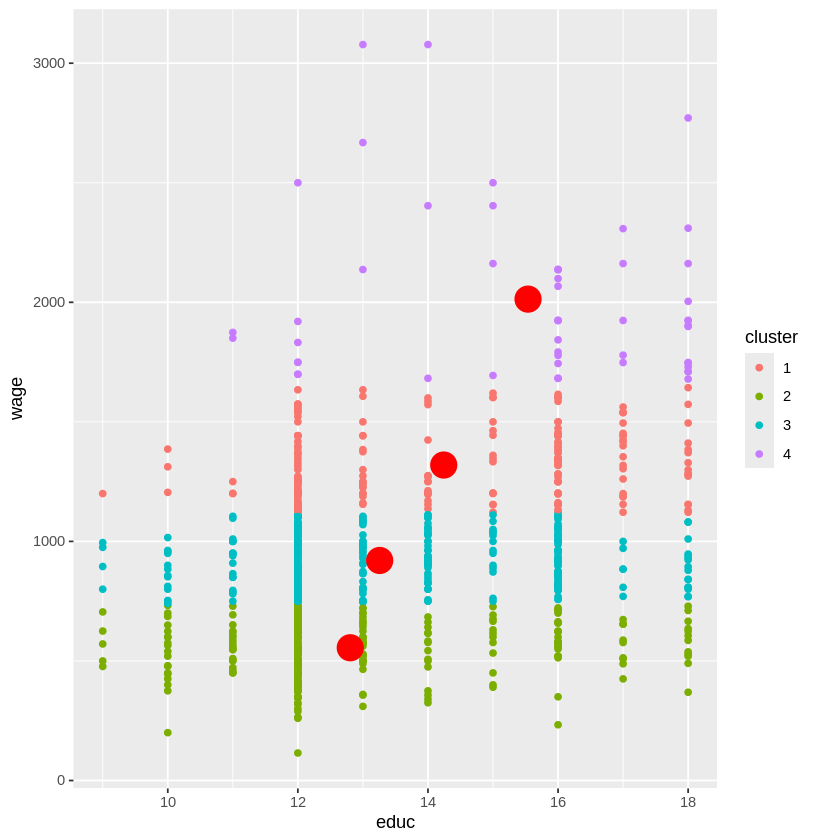

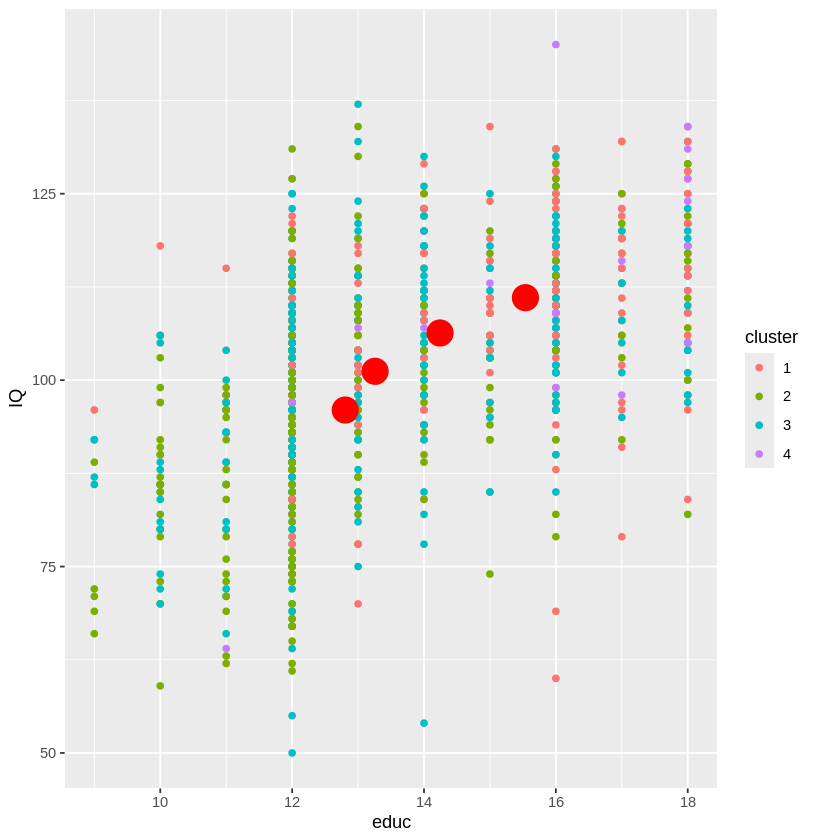

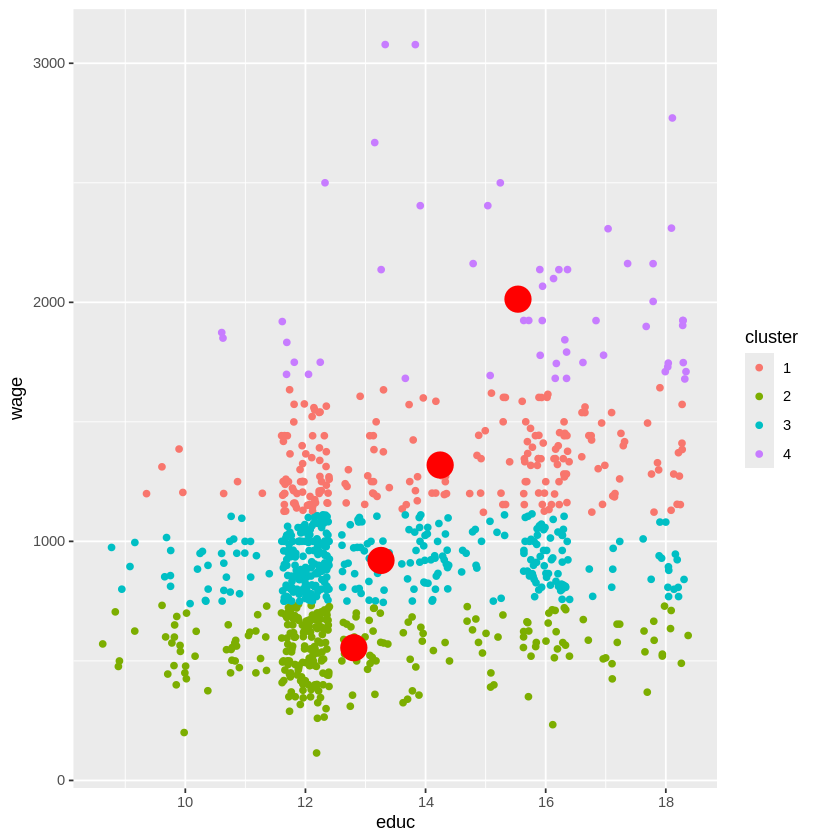

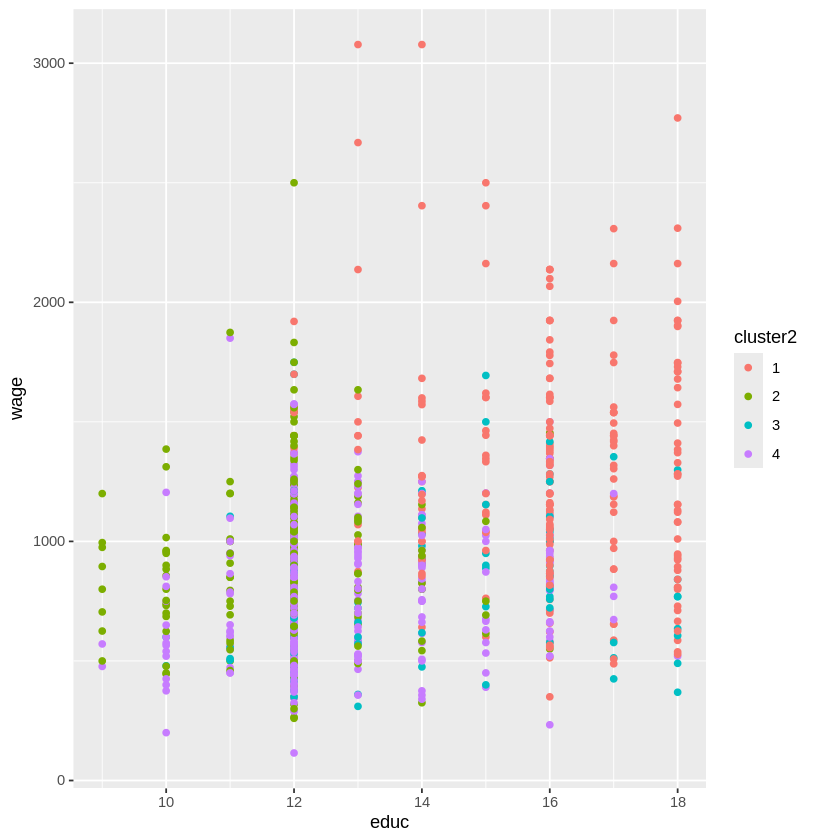

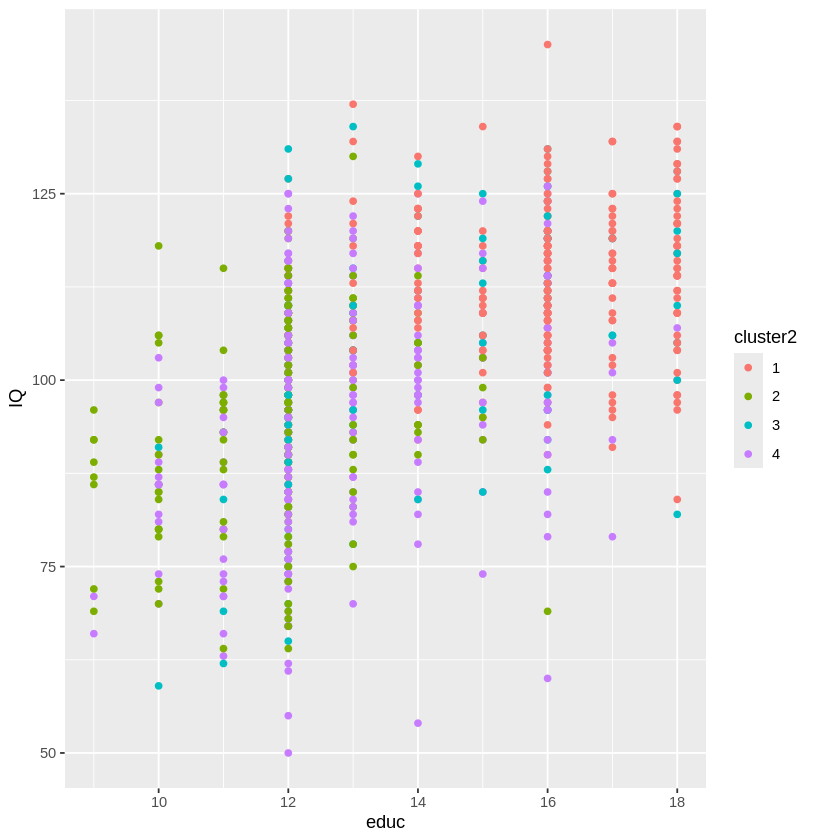


  1   2   3   4 
261  99 250 325 
        1         2         3         4 
 906.4828  787.3232 1291.7520  794.4738 


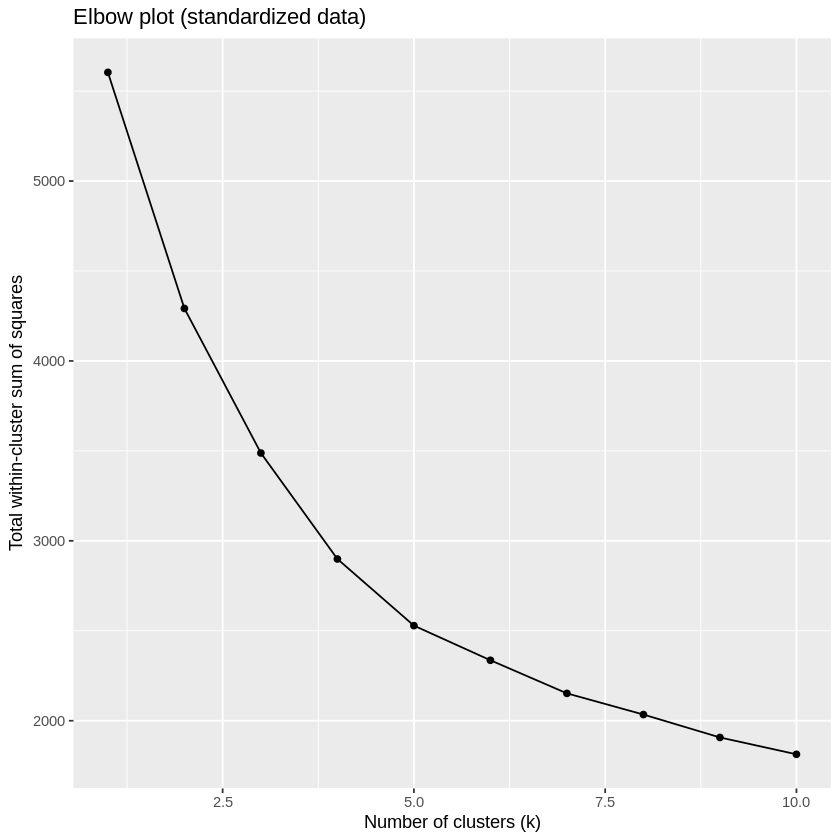

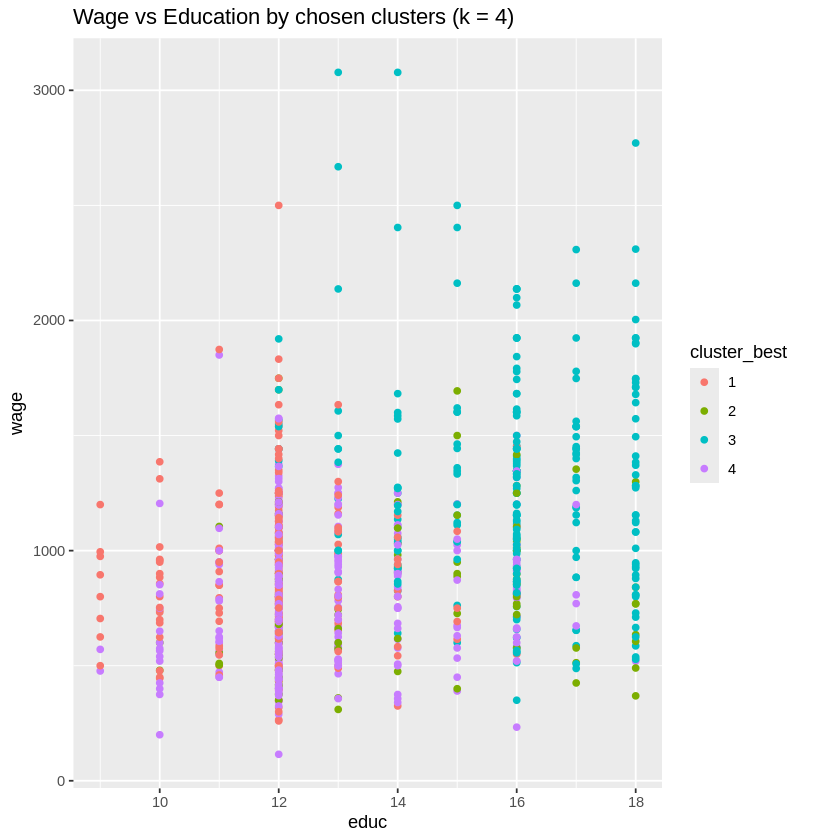

           PC1        PC2         PC3
IQ   0.5994431 -0.3116398 -0.73725745
KWW  0.5413277  0.8363384  0.08661666
educ 0.5896035 -0.4510196  0.67003657


Importance of components:
                          PC1    PC2    PC3
Standard deviation     1.3714 0.7979 0.6948
Proportion of Variance 0.6269 0.2122 0.1609
Cumulative Proportion  0.6269 0.8391 1.0000

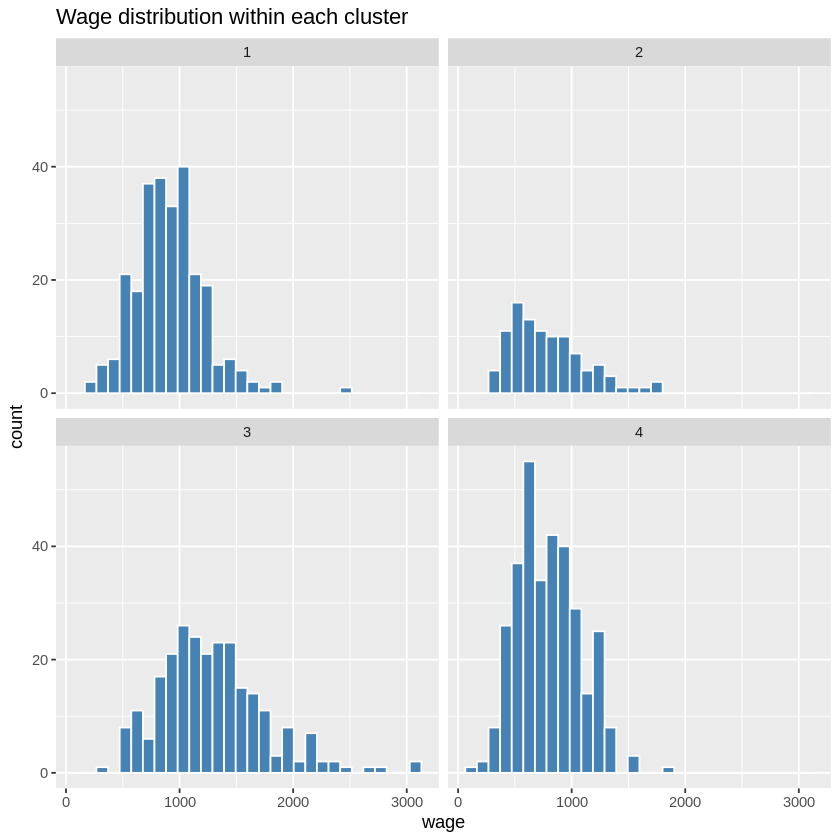


Call:
lm(formula = wage ~ PC1, data = sw)

Residuals:
    Min      1Q  Median      3Q     Max 
-914.52 -241.02  -35.99  194.77 2215.61 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  957.945     12.100   79.17   <2e-16 ***
PC1          119.264      8.828   13.51   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 370 on 933 degrees of freedom
Multiple R-squared:  0.1636,	Adjusted R-squared:  0.1627 
F-statistic: 182.5 on 1 and 933 DF,  p-value: < 2.2e-16



Call:
lm(formula = wage ~ IQ + KWW + educ, data = sw)

Residuals:
    Min      1Q  Median      3Q     Max 
-927.30 -240.12  -32.46  199.57 2250.92 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -231.6018    92.1449  -2.513 0.012123 *  
IQ             3.5675     0.9749   3.660 0.000267 ***
KWW           10.6471     1.7859   5.962 3.54e-09 ***
educ          33.2366     6.5997   5.036 5.71e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 369.9 on 931 degrees of freedom
Multiple R-squared:  0.1657,	Adjusted R-squared:  0.163 
F-statistic: 61.64 on 3 and 931 DF,  p-value: < 2.2e-16


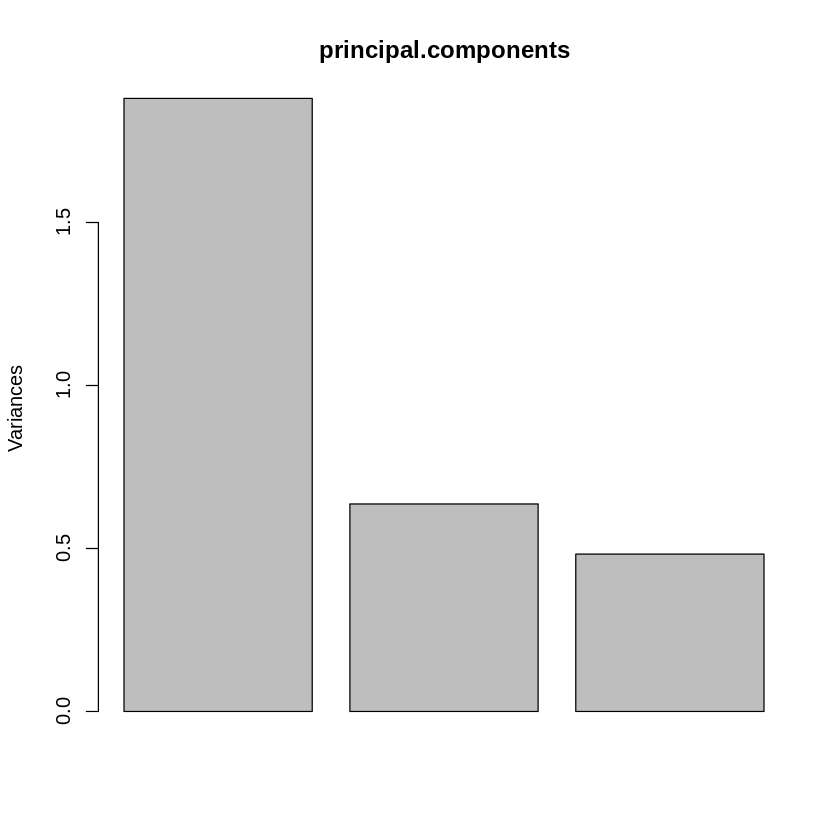

In [5]:
# Clustering example
library(MASS)
library(ggplot2)
wages<-read.csv('http://inta.gatech.s3.amazonaws.com/wage2.csv')
subwages <-wages[,c("wage","IQ","KWW","educ","age","married")]
# Cluster based only on a subset of the data
cluster.results<-kmeans(subwages, 4, nstart=5)
# Calculate clusters, using 5 different starting samples
print(cluster.results)
# Look at cluster results
subwages$cluster<-as.factor(cluster.results$cluster)
# The 'cluster' element of the results is the cluster which each data
# point belongs

ggplot(data=subwages, aes(x=educ, y=wage)) + geom_point(aes(colour=cluster))  +
  geom_point(data=data.frame(cluster.results$centers), colour='red', size=7)
ggplot(data=subwages, aes(x=educ, y=IQ)) + geom_point(aes(colour=cluster)) +
  geom_point(data=data.frame(cluster.results$centers), colour='red', size=7)
# We can plot the data points with colors for the different clusters.
# The colors match up differently along different dimensions

# If you want to see these plots with the data points less on top of each other,
# 'geom_jitter' adds soem noise to each point to move them off of each other:
ggplot(data=subwages, aes(x=educ, y=wage)) + geom_jitter(aes(colour=cluster)) +
  geom_point(data=data.frame(cluster.results$centers), colour='red', size=7)

# When you look at these graphs, it's clear that clustering is mostly happening
# on wage. Why is that? How could you fix it?

####################
# Standardize before doing clustering
zscore<-function(x){
  out<-(x - mean(x))/sd(x)
  return(out)
}
subwages2<-subwages
subwages2$cluster<-NULL
for (col in names(subwages2)){
  subwages2[,col]<-zscore(subwages2[,col])
}
# This loop standardizes the data (subtracts mean and divides by standard deviation)
# so that the data is in z-scores

cluster.results2<-kmeans(subwages2, 4, nstart=5)
subwages$cluster2<-as.factor(cluster.results2$cluster)
ggplot(data=subwages, aes(x=educ, y=wage)) + geom_point(aes(colour=cluster2))
ggplot(data=subwages, aes(x=educ, y=IQ)) + geom_point(aes(colour=cluster2))
# Plot the original data using the new clusters - note there is more of an IQ-based
# pattern and less a pure wages one.

# Explore clusters in this data:
# 1) What happens if you use a different number of clusters?
# 2) How many clusters do you think there should be?
# 3) How good a fit can you get of wages using these clusters?


####################
#  CODE CHANGE START

set.seed(1)
maxk <- 10
wss <- numeric(maxk)

for (k in 1:10){
  tmp <- kmeans(subwages2, centers = k, nstart = 10)
  wss[k] <- tmp$tot.withinss
}

plot_data <- data.frame(k = 1:10, wss = wss)

ggplot(plot_data, aes(x = k, y = wss)) +
  geom_line() + geom_point() +
  labs(title = "Elbow plot (standardized data)",
       x = "Number of clusters (k)",
       y = "Total within-cluster sum of squares")

best_k <- 4
km.best <- kmeans(subwages2, centers = best_k, nstart = 20)
subwages$cluster_best <- as.factor(km.best$cluster)

print(table(subwages$cluster_best))
print(tapply(subwages$wage, subwages$cluster_best, mean))

ggplot(subwages, aes(x = educ, y = wage, colour = cluster_best)) +
  geom_point() +
  labs(title = "Wage vs Education by chosen clusters (k = 4)")

ggplot(subwages, aes(x = wage)) +
  geom_histogram(bins = 30, fill = "steelblue", colour = "white") +
  facet_wrap(~ cluster_best) +
  labs(title = "Wage distribution within each cluster")

# CODE CHANGE END
#################

##########
# Principal Components Analysis
wages<-read.csv('http://inta.gatech.s3.amazonaws.com/wage2.csv')
subwages <-wages[,c("IQ","KWW","educ")]
# Create a subset of wages with just a few columns
principal.components <- prcomp(subwages, retx=T, center=T, scale=T)
# Do a principal components analysis on just the columns in subwages
print(principal.components$rotation) # The weights on each variable
summary(principal.components) # The proportion of variance explained
plot(principal.components) # Graphical depiction of proportion of variance
sw <- cbind(wages,data.frame(principal.components$x))
# Add the new principal components as columns to a new data frame, sw
# (New so we don't muck up going back and running other stuff on wages now)
one.pc <- lm(wage ~ PC1, data= sw)
all.variables <- lm(wage ~ IQ + KWW + educ, data= sw)
summary(one.pc)
summary(all.variables)
# How much better does having three variables do compared to the one principal
# component here? (Look at R^2)

# Try to replicate this using more variables, including perhaps age and marital
# Status. Would you see the same thing?